\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

Below is the definition of the function ```data``` that, given the value of $\rho$, will draw a sample of size 100 from the bivariate normal distribution with desired mean and covariance matrix. 

In [1]:
from scipy.stats import multivariate_normal
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

sample_size = 100
mu = [1, 2]
sigma = lambda rho: [[1, rho], [rho, 1]]
dist = lambda rho: multivariate_normal(mean=mu, cov=sigma(rho))
data = lambda rho: DataFrame(dist(rho).rvs(sample_size), columns=['x', 'y'])
mean = DataFrame([mu], columns=['x', 'y'])

Use the ```data``` function to draw a sample with $\rho=0.6$. The size of the resulting sample is confirmed to be $100\times 2$.

In [2]:
X = data(rho=0.6)
X.shape

(100, 2)

Here is a comparison of the scatter plots with $\rho=0.6$ and $\rho=0.9$. 

ellipse-shaped cloud of data points

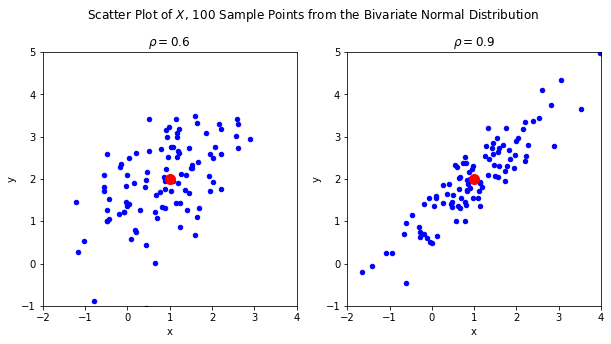

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2)

X = data(rho=0.6)
X.plot(kind='scatter', x='x', y='y', color='blue', ax=ax0) 
data(rho=0.9).plot(kind='scatter', x='x', y='y', color='blue', ax=ax1)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax0)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax1)

ax0.set(aspect=1, title='$\\rho = 0.6$')
ax1.set(aspect=1, title='$\\rho = 0.9$');
fig.set_size_inches(10, 5)
fig.suptitle('Scatter Plot of $X$, 100 Sample Points from the Bivariate Normal Distribution')
plt.show()

## (b) {-}

Below is the histogram of the marginal distribution. The blue line is the KDE plot and the red line is the normal pdf, the height scaled to match the sample size. 

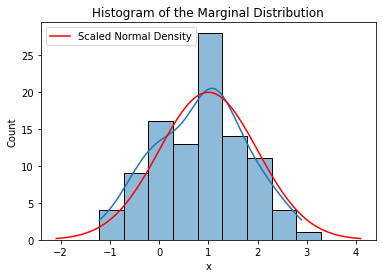

In [4]:
from scipy import stats
import numpy as np
import seaborn as sns

rho = 0.6
norm = stats.norm(loc=mu[0], scale=sigma(rho)[0][0])

binwidth = 0.5
xs = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
ax = sns.histplot(data=X, x='x', kde=True, binwidth=binwidth)
ax.set(title='Histogram of the Marginal Distribution')
Series({x: binwidth*sample_size*norm.pdf(x) for x in xs}, name='Scaled Normal Density').plot(color='red', ax=ax, legend=True)
plt.show()


## (c) {-}

Below is a histogram of $Xv$. The variance looks larger than the first column of the data. In fact analytically it can be shown that $V(Xv) = 1+\rho$. 

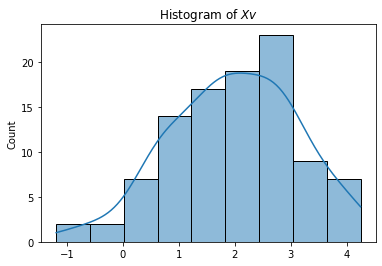

In [5]:
ax = sns.histplot(X @ [1/np.sqrt(2), 1/np.sqrt(2)], kde=True)
ax.set(title='Histogram of $Xv$')
plt.show()

## (d) {-}

The eigenvalues and eigenvectors are computed by the ```numpy.linalg.eig``` function. 

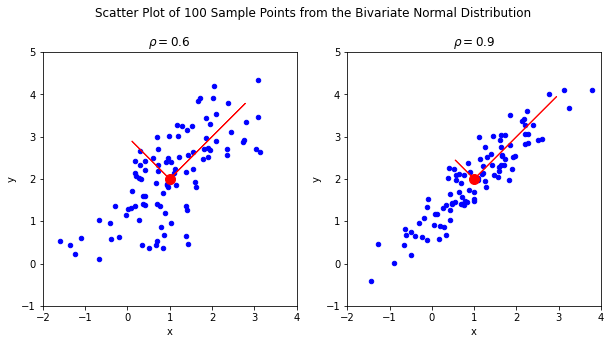

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2)

data(rho=0.6).plot(kind='scatter', x='x', y='y', color='blue', ax=ax0) 
data(rho=0.9).plot(kind='scatter', x='x', y='y', color='blue', ax=ax1)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax0)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax1)

w, v = np.linalg.eig(sigma(0.6))
ax0.arrow(*mu, *(2*np.sqrt(w[0])*v[:, 0]), color='r')
ax0.arrow(*mu, *(2*np.sqrt(w[1])*v[:, 1]), color='r')

w, v = np.linalg.eig(sigma(0.9))
ax1.arrow(*mu, *(2*np.sqrt(w[0])*v[:, 0]), color='r')
ax1.arrow(*mu, *(2*np.sqrt(w[1])*v[:, 1]), color='r')

ax0.set(aspect=1, title='$\\rho = 0.6$')
ax1.set(aspect=1, title='$\\rho = 0.9$');
fig.set_size_inches(10, 5)
fig.suptitle('Scatter Plot of 100 Sample Points from the Bivariate Normal Distribution')
plt.show()

## (g) {-}

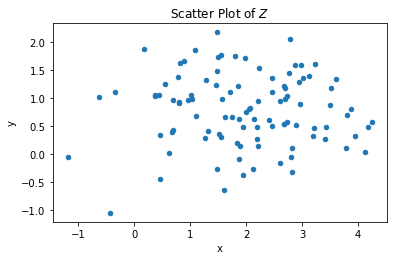

In [7]:
w, v = np.linalg.eig(sigma(0.6))
v1 = v[:, 0]
v2 = v[:, 1]

Z = DataFrame({'x': X@v1, 'y': X@v2})
ax = Z.plot(kind='scatter', x='x', y='y')
ax.set(aspect=1, title='Scatter Plot of $Z$')
plt.show()

In [8]:
print(X['x'].corr(X['y']))
print(Z['x'].corr(Z['y']))

0.522244908509301
-0.012208918584303334


# 2. {-}

## (a) {-}

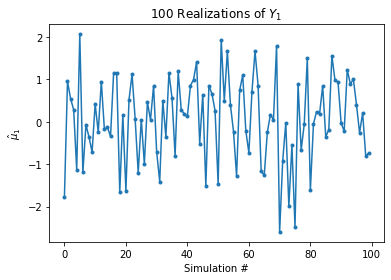

Fraction of confidence intervals that cover 0: 0.96


In [9]:
from pandas import Series

sample = [stats.norm.rvs(size=100)[0] for i in range(100)]
ss = Series(sample)
ax = ss.plot(style='.-')
ax.set(xlabel='Simulation #', ylabel='$\hat\mu_1$', title='100 Realizations of $Y_1$')
plt.show()


z = stats.norm.ppf(1 - 0.025)    # 1.96

print('Fraction of confidence intervals that cover 0:', ss[(ss-z < 0) & (ss+z > 0)].size / ss.size)

## (b) {-}

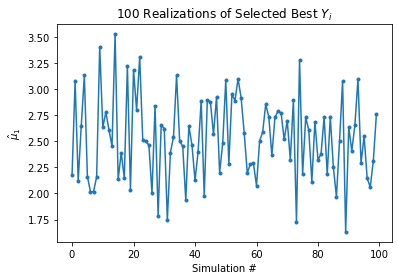

Fraction of confidence intervals that cover 0: 0.05


In [10]:
from pandas import Series

sample = [max(stats.norm.rvs(size=100)) for i in range(100)]
ss = Series(sample)
ax = ss.plot(style='.-')
ax.set(xlabel='Simulation #', ylabel='$\hat\mu_1$', title='100 Realizations of Selected Best $Y_i$')
plt.show()


z = stats.norm.ppf(1 - 0.025)    # 1.96

print('Fraction of confidence intervals that cover 0:', ss[(ss-z < 0) & (ss+z > 0)].size / ss.size)

# 3. {-}

## (a) {-}

The proof will consist of two parts. First we show that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Second we show that the OLS estimator with predictor matrix $\tilde X$ and $\tilde y$ is also the solution to the same linear system. Thus they are identical. 

To verify the first part, we expand the objective function: 
\begin{align*}
\lVert y - X\beta \rVert^2_2 + \lambda\lVert \beta \rVert^2_2 &= (y - X\beta)^T(y - X\beta) + \lambda \beta^T\beta\\
&= (y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta) + \lambda \beta^T\beta\\
&= y^Ty - 2\beta^TX^Ty + \beta^T(X^TX + \lambda I)\beta.
\end{align*}
This is a quadratic form in $\beta$. At its minimum the gradient must be zero, so 
\begin{align*}
-2X^Ty + ((X^TX + \lambda I) + (X^TX + \lambda I)^T)\beta = 0. 
\end{align*}
Simplify to conclude that $\hat\beta^{\text{ridge}}$, where the objective function reaches its minimum, is the solution to $(X^T X + \lambda I)\beta = X^T y$.


For the second part, we know that the OLS estimator is the solution to $\tilde X^T\tilde X \beta = \tilde X^T\tilde y$. Using block matrix multiplication, it is easy to see that $\tilde X^T\tilde X = X^TX +\lambda I$ and $\tilde X^T\tilde y = X^T\tilde y$. So again the OLS estimator is the solution to $(X^T X + \lambda I)\beta = X^T y$ and hence the proof is complete. 


## (b) {-}

If the columns of $\tilde X$ are linearly dependent, by definition there exists a non-zero vector $v\in\mathbb R^p$ such that $\tilde X v$ is a zero vector in $\mathbb R^{n+p}$. But using block matrix multiplication, we see that this also means $(\sqrt{\lambda I})v = \sqrt\lambda v$ is a zero vector in $\mathbb R^{p}$, a contraction. So the columns of $\tilde X$ are linearly independent.


## (c) {-}

In part (a), we have established that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Assuming $\lambda > 0$, $(X^T X + \lambda I)$ is clearly positive definite and hence invertible, in which case $\hat\beta^{\text{ridge}} = (X^T X + \lambda I)^{-1}X^T y$, and hence $a^T\hat\beta^{\text{ridge}} = a^T(X^T X + \lambda I)^{-1}X^T y$ is a linear function of $y$. 


# 4. {-}

## (a) {-}

Note that $U^TU = I$ and, because $D$ is diagonal, $D(D^{2})^{-1}D = I$. Thus in OLS we have 
\begin{align*}
\hat Y &= X(X^TX)^{-1}X^TY \\ 
&= UDV^T(VDU^TUDV^T)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T)^{-1}VDU^TY \\
&= UDV^T(V^T)^{-1}(D^2)^{-1}V^{-1}VDU^TY \\
&= UD(D^2)^{-1}DU^TY \\
&= UU^TY.
\end{align*}


## (b) {-}

In the ridge regression we have 
\begin{align*}
\hat Y &= X(X^TX + \lambda I)^{-1}X^TY \\ 
&= UDV^T(VDU^TUDV^T + \lambda I)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T + \lambda I)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T + \lambda VV^T)^{-1}VDU^TY \\
&= UDV^T(V(D^2 + \lambda I)V^T)^{-1}VDU^TY \\
&= UDV^T(V^T)^{-1}(D^2 + \lambda I)^{-1}V^{-1}VDU^TY \\
&= UD(D^2 + \lambda I)^{-1}DU^TY \\
%&= UU^TY.
\end{align*}



The proof will consist of two parts. First we show that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Second we show that the OLS estimator with predictor matrix $\tilde X$ and $\tilde y$ is also the solution to the same linear system. Thus they are identical. 

To verify the first part, we expand the objective function: 
\begin{align*}
\lVert y - X\beta \rVert^2_2 + \lambda\lVert \beta \rVert^2_2 &= (y - X\beta)^T(y - X\beta) + \lambda \beta^T\beta\\
&= (y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta) + \lambda \beta^T\beta\\
&= y^Ty - 2\beta^TX^Ty + \beta^T(X^TX + \lambda I)\beta.
\end{align*}
This is a quadratic form in $\beta$. At its minimum the gradient must be zero, so 
\begin{align*}
-2X^Ty + ((X^TX + \lambda I) + (X^TX + \lambda I)^T)\beta = 0. 
\end{align*}
Simplify to conclude that $\hat\beta^{\text{ridge}}$, where the objective function reaches its minimum, is the solution to $(X^T X + \lambda I)\beta = X^T y$.


For the second part, we know that the OLS estimator is the solution to $\tilde X^T\tilde X \beta = \tilde X^T\tilde y$. Using block matrix multiplication, it is easy to see that $\tilde X^T\tilde X = X^TX +\lambda I$ and $\tilde X^T\tilde y = X^T\tilde y$. So again the OLS estimator is the solution to $(X^T X + \lambda I)\beta = X^T y$ and hence the proof is complete. 


## (b) {-}

If the columns of $\tilde X$ are linearly dependent, by definition there exists a non-zero vector $v\in\mathbb R^p$ such that $\tilde X v$ is a zero vector in $\mathbb R^{n+p}$. But using block matrix multiplication, we see that this also means $(\sqrt{\lambda I})v = \sqrt\lambda v$ is a zero vector in $\mathbb R^{p}$, a contraction. So the columns of $\tilde X$ are linearly independent.


## (c) {-}

In part (a), we have established that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Assuming $\lambda > 0$, $(X^T X + \lambda I)$ is clearly positive definite and hence invertible, in which case $\hat\beta^{\text{ridge}} = (X^T X + \lambda I)^{-1}X^T y$, and hence $a^T\hat\beta^{\text{ridge}} = a^T(X^T X + \lambda I)^{-1}X^T y$ is a linear function of $y$. 
